In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression,SGDClassifier
from sklearn.metrics import mean_squared_error, r2_score,make_scorer, confusion_matrix,classification_report,roc_auc_score
from sklearn.utils import shuffle, resample
from sklearn import cross_validation, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score,StratifiedKFold
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import model_selection

from sklearn import datasets
from sklearn.feature_selection import RFE,RFECV,SelectFromModel

from sklearn.svm import SVC,LinearSVC
import random

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

F:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv("Hotel_Unique_Complete.csv")
df.shape

(16033, 158)

In [3]:
df=df.fillna(0)

In [5]:
df1=df.iloc[:,1:]
col=df.iloc[:,1:].values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))#range(0,1)
col_scaler=min_max_scaler.fit_transform(col)
Normalized_df=pd.DataFrame(col_scaler, columns=df1.columns)
Normalized_df['Overall_Label']=df['Overall_Label']
print(Normalized_df.head(20))

    Num_reviews  Num_likes  duplicateusertimesaggregated  diff<=5  \
0      0.001070   0.000374                      0.272727      0.0   
1      0.022825   0.015333                      0.090909      0.0   
2      0.000713   0.000748                      0.000000      0.0   
3      0.001070   0.000374                      0.000000      0.0   
4      0.001427   0.002618                      0.000000      0.0   
5      0.028174   0.013089                      0.000000      0.0   
6      0.000357   0.000374                      0.090909      0.0   
7      0.143723   0.039641                      0.181818      0.0   
8      0.004636   0.003366                      0.000000      0.0   
9      0.000357   0.000000                      0.000000      0.0   
10     0.005350   0.001870                      0.000000      0.0   
11     0.000713   0.000374                      0.000000      0.0   
12     0.036377   0.013463                      0.000000      0.0   
13     0.007489   0.002618        

In [7]:
# 2/3 training and 1/3 test
X, y=Normalized_df.iloc[:,:-1].values, Normalized_df['Overall_Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=None) 

In [10]:
# Linear Kernel
svm = svm.SVC(kernel='linear', probability=True,random_state=0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9491589491589492


In [11]:
Confusion_matrix=confusion_matrix(y_test, y_pred)
print(Confusion_matrix)

[[   0  269]
 [   0 5022]]


In [12]:
y_score = svm.fit(X_train, y_train).decision_function(X_test)
print(y_score)

[1.00015073 1.00016199 1.00010579 ... 1.00017133 1.00005972 1.00017203]


In [13]:
fpr,tpr,threshold = roc_curve(y_test, y_score) 
roc_auc = auc(fpr,tpr)

<Figure size 432x288 with 0 Axes>

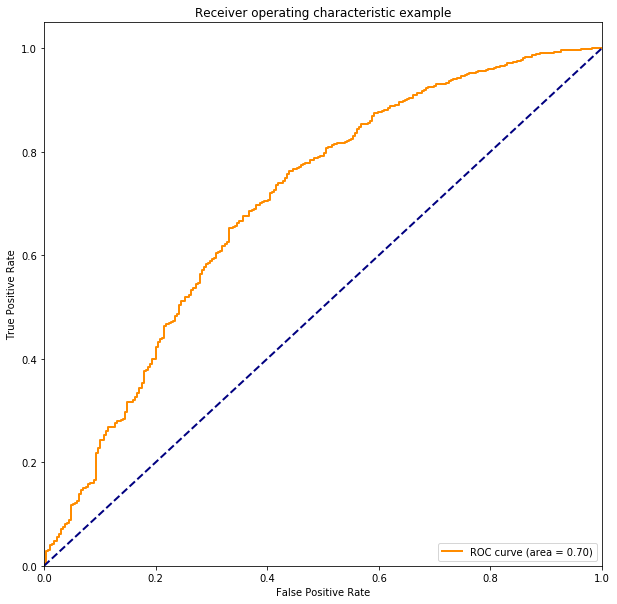

In [14]:
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()